In [125]:
'''
Patrick Ballou
ID: 801130521
ECGR 4105
Homework 2
Problem 3
'''

'\nPatrick Ballou\nID: 801130521\nECGR 4105\nHomework 2\nProblem 3\n'

In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [127]:
breast = load_breast_cancer()

In [128]:
breast_data = breast.data
breast_data.shape

(569, 30)

In [129]:
breast_input = pd.DataFrame(breast_data)

In [130]:
breast_labels = breast.target
breast_labels.shape

(569,)

In [131]:
labels = np.reshape(breast_labels,(569,1))
final_breast_data = np.concatenate([breast_data, labels],axis=1)
final_breast_data.shape

(569, 31)

In [132]:
breast_dataset = pd.DataFrame(final_breast_data)
features = breast.feature_names
features

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [133]:
features_labels = np.append(features, 'label')
breast_dataset.columns = features_labels
breast_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [134]:
df_train, df_test = train_test_split(breast_dataset, train_size=.8, test_size=.2, random_state=7)

In [96]:
#split into x and y, train and test
x_train = df_train[features]
Y_train = df_train['label']

x_test = df_test[features]
Y_test = df_test['label']

In [135]:
#standard scaler is best here
scaler = StandardScaler()
#scaler = MinMaxScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.fit_transform(x_test)

In [136]:
#tested which C value is best with for loop and found .1 to perform best
'''
C = [10, 1, .1, .01, .001]

for c in C:
    classifier = LogisticRegression(random_state=7, C=c)
    classifier.fit(X_train, Y_train)
    print("C:", c)
    print("Training accuracy:", classifier.score(X_train, Y_train))
    print("Testing accuracy:", classifier.score(X_test, Y_test))

'''
#C=.1 is the best
classifier = LogisticRegression(random_state=7, C=.1)
classifier.fit(X_train, Y_train)

LogisticRegression(C=0.1, random_state=7)

In [137]:
Y_pred = classifier.predict(X_test)
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred)
cnf_matrix

array([[39,  1],
       [ 0, 74]], dtype=int64)

In [138]:
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))
print("Precision:", metrics.precision_score(Y_test, Y_pred))
print("Recall:", metrics.recall_score(Y_test, Y_pred))

Accuracy: 0.9912280701754386
Precision: 0.9866666666666667
Recall: 1.0


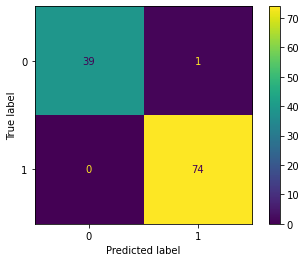

In [139]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=[0, 1])
cm_display.plot()

In [140]:
#3b: add penalty
'''
C = [10, 1, .1, .01, .001]

for c in C:
    classifier = LogisticRegression(random_state=7, C=c, penalty='l2')
    classifier.fit(X_train, Y_train)
    print("C:", c)
    print("Training accuracy:", classifier.score(X_train, Y_train))
    print("Testing accuracy:", classifier.score(X_test, Y_test))
'''
#C=.1 is the best
classifier = LogisticRegression(random_state=7, C=.1)
classifier.fit(X_train, Y_train)

LogisticRegression(C=0.1, random_state=7)

In [141]:
Y_pred = classifier.predict(X_test)
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred)
cnf_matrix

array([[39,  1],
       [ 0, 74]], dtype=int64)

In [142]:
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))
print("Precision:", metrics.precision_score(Y_test, Y_pred))
print("Recall:", metrics.recall_score(Y_test, Y_pred))

Accuracy: 0.9912280701754386
Precision: 0.9866666666666667
Recall: 1.0


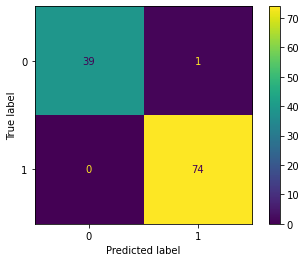

In [143]:
#this model is very good
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=[0, 1])
cm_display.plot()